# Plots for the 2MDM analysis

In [77]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import glob,os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.interpolate import griddata,interp1d
from itertools import product
from auxPlots import readContours,getContours,saveContours
import pyslha

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu_r']

### Load Contours from each scan

In [78]:
curves = {}
for f in sorted(glob.glob('./DMconstraints*.csv')):
    curves[f] = readContours(f)

In [79]:
modelLabels = {}
for scanLabel in ['scan0','scan2','scan3']:
    modelPars = pyslha.readSLHAFile(os.path.join('../data/maddmOutput',scanLabel,'Cards/param_card.dat'))
    gchi = modelPars.blocks['NPINPUTS'][1]
    gq = modelPars.blocks['NPINPUTS'][2]
    sina = modelPars.blocks['NPINPUTS'][3]
    mS = modelPars.blocks['MASS'][9900026]

    if scanLabel == 'scan0':
        mS = '%1.0f {\\rm TeV}' %(mS/1e3)
    else:
        mS = "(m_{Z^\\prime} + m_{\\chi})/2"
    textstr = ', '.join((
        r'$m_S = %s$' %mS,
        r'$g_q =$ %1.2f' %gq,
        r'$g_\chi =$ %1.2f' %gchi,
        r'$\sin\alpha =$ %1.1f' %sina))
    modelLabels[scanLabel] = textstr

### Plot Contours

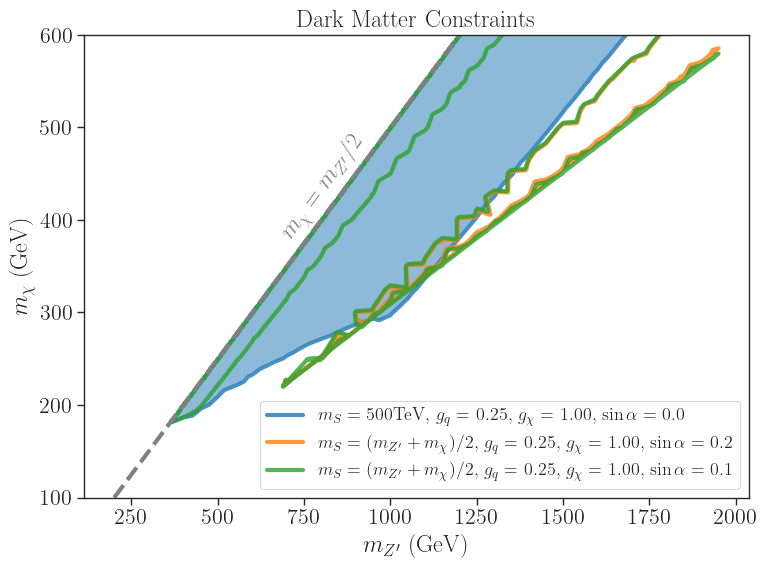

In [80]:
xLabels = {'mZp' : r'$m_{Z^\prime}$ (GeV)'}
yLabels = {'mChi' : r'$m_{\chi}$ (GeV)'}


fig = plt.figure(figsize=(8,6))

for label,contourDict in curves.items():    
    xL,xLabel = list(xLabels.items())[0]
    yL,yLabel = list(yLabels.items())[0]
    x = contourDict[1.0][xL]
    y = contourDict[1.0][yL]
    for scanLabel in modelLabels:
        if scanLabel in label:
            mLabel = modelLabels[scanLabel]
            break
    if 'scan0' in label:
        plt.fill(x,y,alpha=0.5,linewidth=3,label=None)
    plt.plot(x,y,alpha=0.8,linewidth=3,label=mLabel)
plt.axline((200.,100.),slope=0.5,linewidth=3,color='gray',linestyle='dashed')
plt.text(600.+70,300.+80,r'$m_{\chi} = m_{Z^\prime}/2$',rotation=54.0,color='gray')
plt.xlabel(xLabel)
plt.ylabel(yLabel)
plt.ylim(100.,600.)
plt.legend(loc='lower right',fontsize=13)
plt.title('Dark Matter Constraints')
plt.tight_layout()
plt.savefig('DMconstraintsSummary.png')
plt.show()    